<a href="https://colab.research.google.com/github/ovieimara/ITNPBD6/blob/master/Predictive_models_that_will_identify_whether_a_customer_will_take_out_a_new_contract_in_response_to_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=70146b8880428bb09f8a5f436c2ce0289903e0fd4d1cdc606b57e3721c25a069
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from ydata_profiling import ProfileReport
from typing import Tuple, List, Dict, Set, Callable
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

warnings.filterwarnings('ignore')

In [ ]:
#read data from csv
file = "wallacecommunications.csv"
data = pd.read_csv(file)
wallace_df = pd.DataFrame(data)
wallace_df.head(10)

ID               town country  age            job   married  \
0  32390233            Bristol      UK   39     management   married   
1  41226029           Basildon      UK   53      housemaid   married   
2  85498057          Blackburn      UK   79        retired  divorced   
3  76539627             Oldham      UK   43       services    single   
4  76290986      Middlesbrough      UK   35     technician    single   
5  68021702              Poole      UK   24        student    single   
6  96070931          Stockport      UK   49    blue-collar  divorced   
7  30634833      Wolverhampton      UK   54  self-employed    single   
8  86937259         Eastbourne      UK   29       services   married   
9  61290308  Weston-super-Mare      UK   56    blue-collar    single   

   education arrears  current_balance housing has_tv_package last_contact  \
0   tertiary      no            -1.90      no            yes      unknown   
1    primary      no             3.62      no             no     cellular   
2    primary      no            27.87      no             no    telephone   
3  secondary      no             5.50     yes             no     cellular   
4  secondary      no             3.44      no             no     cellular   
5  secondary      no             1.39      no             no     cellular   
6    primary      no             0.24     yes             no     cellular   
7   tertiary      no             3.84      no            yes     cellular   
8    primary      no            -1.02      no             no      unknown   
9  secondary      no            11.87     yes             no     cellular   

   conn_tr  last_contact_this_campaign_day last_contact_this_campaign_month  \
0        4                              11                              jun   
1        1                              28                              jul   
2        3                              13                              jul   
3        3                              13                              may   
4        2                              27                              aug   
5        2                               9                              sep   
6        2                              11                              may   
7        4                              27                              may   
8        5                               4                              jul   
9        2                               5                              feb   

   this_campaign  days_since_last_contact_previous_campaign  \
0              8                                         -1   
1              2                                         -1   
2              1                                        377   
3              2                                         -1   
4             16                                         -1   
5              4                                         -1   
6              1                                        362   
7              1                                         -1   
8              1                                         -1   
9              2                                         -1   

   contacted_during_previous_campaign outcome_previous_campaign  \
0                                   0                   unknown   
1                                   0                   unknown   
2                                   1                   success   
3                                   0                   unknown   
4                                   0                   unknown   
5                                   0                   unknown   
6                                   1                   success   
7                                   0                   unknown   
8                                   0                   unknown   
9                                   0                   unknown   

  new_contract_this_campaign  
0                        yes  
1   

In [ ]:
#check shape
wallace_df.shape

(50662, 20)

In [ ]:
wallace_df.describe(include="all")

ID    town country           age         job  married  \
count   5.066200e+04   50662   50662  50662.000000       50662    50662   
unique           NaN     101       5           NaN          12        3   
top              NaN  London      UK           NaN  management  married   
freq             NaN    3241   50657           NaN       10849    30045   
mean    5.502871e+07     NaN     NaN     40.979373         NaN      NaN   
std     2.598596e+07     NaN     NaN     10.919324         NaN      NaN   
min     1.000073e+07     NaN     NaN     18.000000         NaN      NaN   
25%     3.249964e+07     NaN     NaN     32.000000         NaN      NaN   
50%     5.501127e+07     NaN     NaN     39.000000         NaN      NaN   
75%     7.748809e+07     NaN     NaN     48.000000         NaN      NaN   
max     9.999952e+07     NaN     NaN     95.000000         NaN      NaN   

        education arrears  current_balance housing has_tv_package  \
count       50662   50662     50662.000000   50662          50662   
unique          4       2              NaN       2              3   
top     secondary      no              NaN     yes             no   
freq        25779   49794              NaN   27250          42886   
mean          NaN     NaN        13.991210     NaN            NaN   
std           NaN     NaN        30.899163     NaN            NaN   
min           NaN     NaN       -80.190000     NaN            NaN   
25%           NaN     NaN         0.820000     NaN            NaN   
50%           NaN     NaN         4.720000     NaN            NaN   
75%           NaN     NaN        14.950000     NaN            NaN   
max           NaN     NaN       984.170000     NaN            NaN   

       last_contact       conn_tr  last_contact_this_campaign_day  \
count         50662  50662.000000                    50662.000000   
unique            4           NaN                             NaN   
top        cellular           NaN                             NaN   
freq          33595           NaN                             NaN   
mean            NaN      3.005093                       15.768525   
std             NaN      1.409003                        8.347083   
min             NaN      1.000000                        1.000000   
25%             NaN      2.000000                        8.000000   
50%             NaN      3.000000                       16.000000   
75%             NaN      4.000000                       21.000000   
max             NaN      5.000000                       31.000000   

       last_contact_this_campaign_month  this_campaign  \
count                             50662   50662.000000   
unique                               13            NaN   
top                                 may            NaN   
freq                              14869            NaN   
mean                                NaN       2.713217   
std                                 NaN       3.052227   
min                                 NaN       1.000000   
25%                                 NaN       1.000000   
50%                                 NaN       2.000000   
75%                                 NaN       3.000000   
max                                 NaN      63.000000   

        days_since_last_contact_previous_campaign  \
count                                50662.000000   
unique                                        NaN   
top                                           NaN   
freq                                          NaN   
mean                                    42.644408   
std                                    102.238078   
min                                     -1.000000   
25%                                     -1.000000   
50%                                     -1.000000   
75%                                     -1.000000   
max                                    871.000000   

        contacted_during_previous_campaign outcome_previous_campaign  \
count                         50662.000000           

In [ ]:
wallace_df['outcome_previous_campaign'].unique()

array(['unknown', 'success', 'other', 'failure'], dtype=object)

In [ ]:
wallace_df['new_contract_this_campaign'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
wallace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50662 entries, 0 to 50661
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         50662 non-null  int64  
 1   town                                       50662 non-null  object 
 2   country                                    50662 non-null  object 
 3   age                                        50662 non-null  int64  
 4   job                                        50662 non-null  object 
 5   married                                    50662 non-null  object 
 6   education                                  50662 non-null  object 
 7   arrears                                    50662 non-null  object 
 8   current_balance                            50662 non-null  float64
 9   housing                                    50662 non-null  object 
 10  has_tv_package        

In [ ]:
profile_report = ProfileReport(wallace_df, title = 'Profile Data')
profile_report.config.html.full_width = True
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'current_balance'}>],
       [<Axes: title={'center': 'conn_tr'}>,
        <Axes: title={'center': 'last_contact_this_campaign_day'}>,
        <Axes: title={'center': 'this_campaign'}>],
       [<Axes: title={'center': 'days_since_last_contact_previous_campaign'}>,
        <Axes: title={'center': 'contacted_during_previous_campaign'}>,
        <Axes: >]], dtype=object)

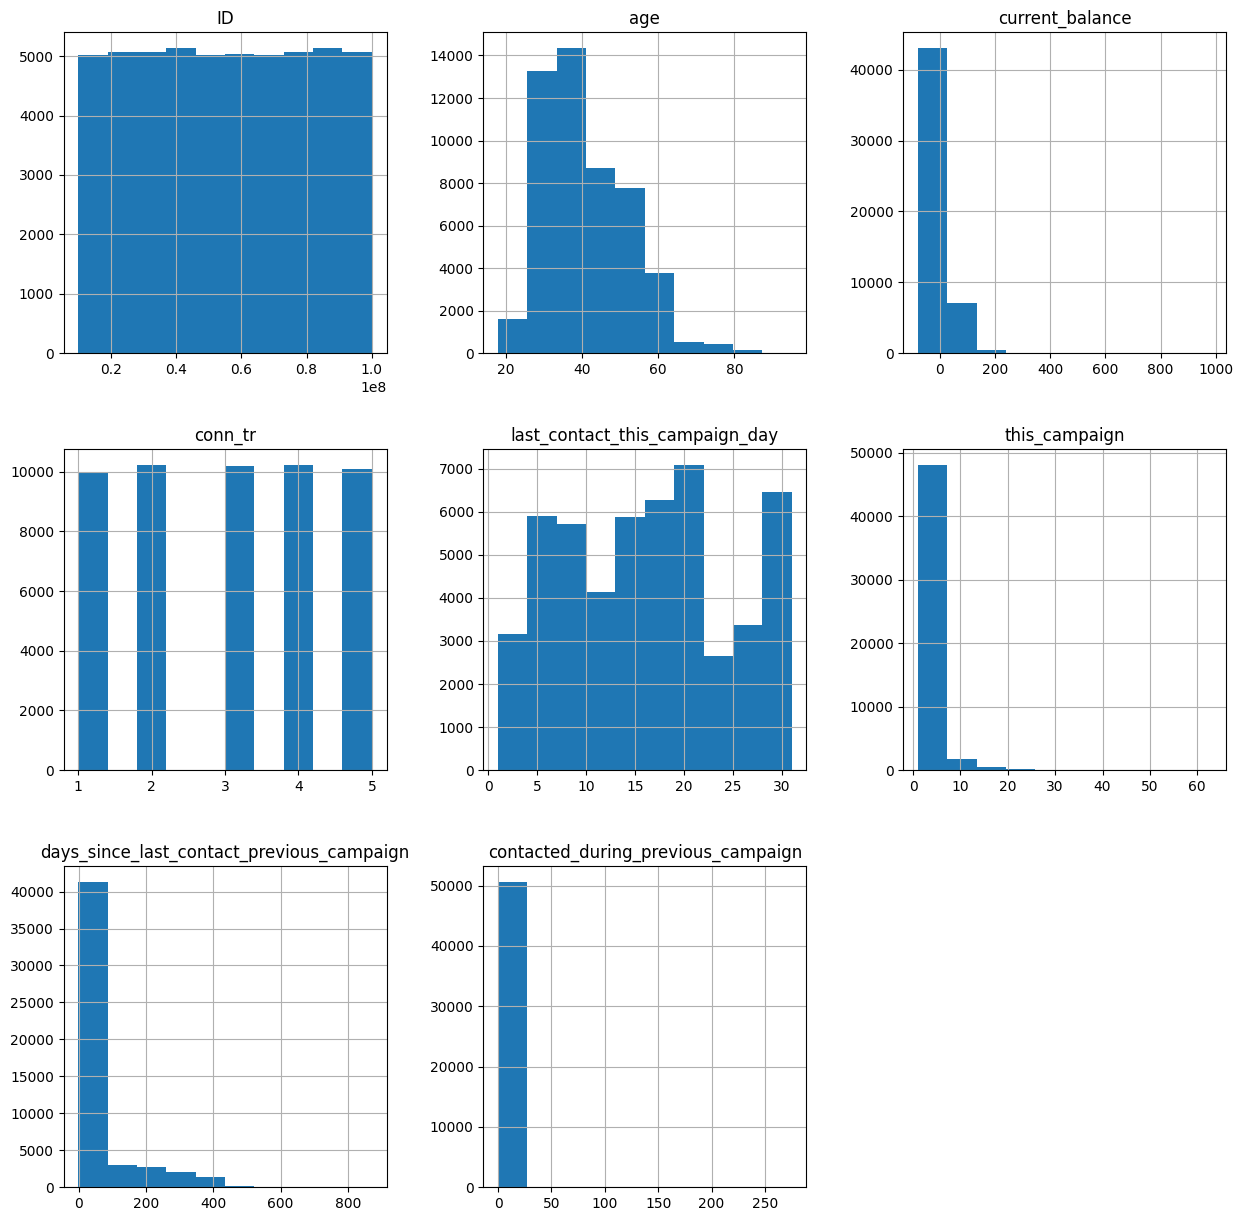

In [ ]:
wallace_df.hist(figsize=(15, 15))

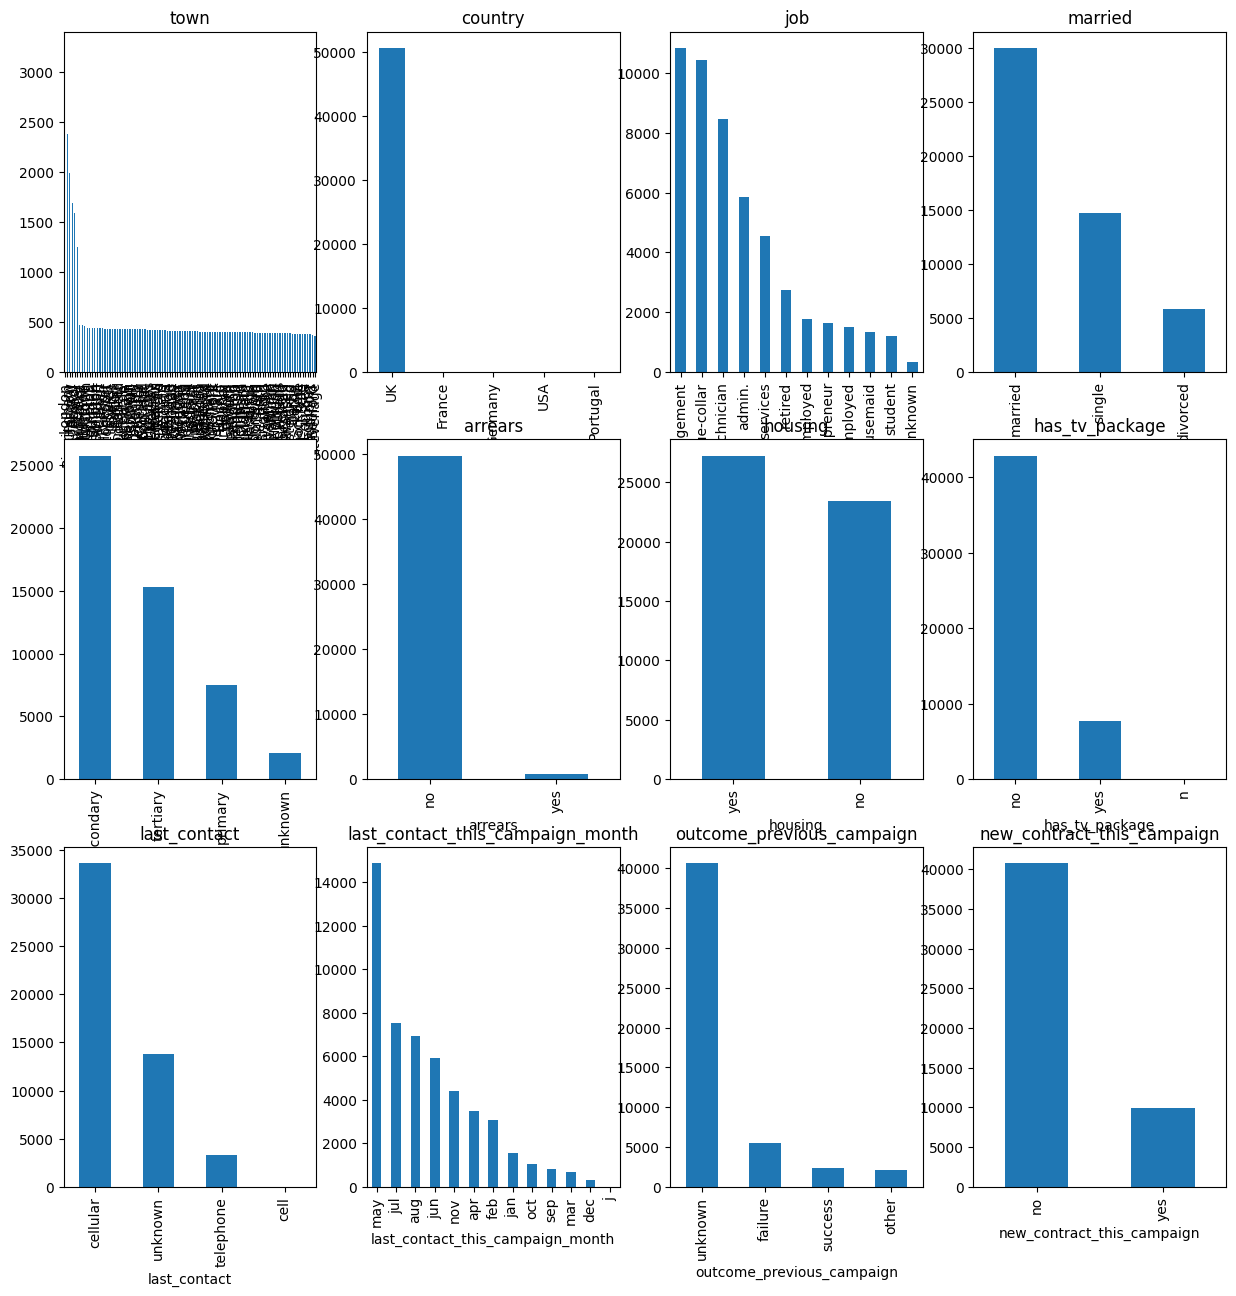

In [ ]:
def plot_categorical(df: np.array) -> None:
  i = 1
  plt.figure(figsize=(15, 15))
  for col in wallace_df.select_dtypes(include='object').columns:
      plt.subplot(3, 4, i)
      plt.title(col)
      i += 1
      wallace_df[col].value_counts().plot(kind='bar')

  plt.show()

plot_categorical(wallace_df)

**Data Cleaning**

In [ ]:
# wallace_df['age'].plot(kind='hist', bins=50)
#plot probaility density curve
def plot_hist_kde(df: np.array, column: str, bins: int = 20) -> None:
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 3, 1)
  sns.histplot(df[column], bins=bins)
  plt.subplot(1, 3, 2)
  sns.kdeplot(df[column])
  plt.subplot(1, 3, 3)
  sns.boxplot(df[column])
  plt.suptitle(f'Distribution of {column}')
  plt.tight_layout()
  plt.show()

# plot_hist_kde(wallace_df, 'age', 30)

In [ ]:
import scipy.stats as stats

def check_normal_distribution(df: np.array, column: str) -> None:
  skewness = stats.skew(wallace_df[column])
  statistic, p_value = stats.shapiro(wallace_df[column])

  print(f"Skewness: {skewness}")
  print(f"Skewness Test Statistic: {statistic}")
  print(f"P-value: {p_value}")

  # Interpret the result
  alpha = 0.05  # Significance level
  if p_value < alpha:
      print("The distribution is not normal (reject the null hypothesis).")
  else:
      print("The distribution is normal (fail to reject the null hypothesis).")

  return p_value, statistic
# check_normal_distribution(wallace_df, 'age')

In [ ]:
def replace_value(df: np.array, column: str, old_value: str, new_value: str) -> None:
  df[column] = df[column].apply(lambda x: new_value if x == old_value else x)

# replace_value(wallace_df, 'has_tv_package', 'n', 'no')
# wallace_df['has_tv_package'].value_counts()

In [ ]:
#Apply log transformation

def log_transformation(df: np.array, column: str, func: Callable = np.log, shift: int = 0) -> None:
  df[f"log_{column}"] = func( df[column] + shift)

# log_transformation(wallace_df, 'age')
# plot_hist_kde(wallace_df, 'age')
# plot_hist_kde(wallace_df, 'log_age')
# check_normal_distribution(wallace_df, 'log_age')

# plt.hist(wallace_df['log_age'], bins=10, color='green', alpha=0.7)
# plt.title('Transformed Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# wallace_df[filter]

**Update Rows**

In [ ]:
#balance columns
# def undersample_column(df: np.array, columns: str):
#   group = df.groupby(columns)
#   return pd.DataFrame(group.apply(lambda x: x.sample(group.size().min()))).reset_index(drop=True)

def undersample_column(X, y):
  rus = RandomUnderSampler(random_state=42)
  return rus.fit_resample(X, y)

# def oversample_column(df: np.array, columns: str):
def oversample_column(X, y):

  # Get the maximum size of the groups
  # group = df.groupby(columns)
  # max_size = group.size().max()
  smote = SMOTE(random_state=42)
  return smote.fit_resample(X, y)
  # return pd.DataFrame(X_resampled, columns=df.drop(columns, axis=1).columns)

  # Sample `max_size` rows from each group (with replacement) and reset the index
  # return group.apply(lambda x: x.sample(max_size, replace=True, random_state=42)).reset_index(drop=True)

# undersample_column(wallace_df, ['arrears', 'new_contract_this_campaign'])

In [ ]:
def replace_value(df: np.array, column: str, old_value: str, new_value: str) -> None:
  return df.assign(column=df[column].mask(df[column] == old_value, new_value))
  # df[column] = df[column].apply(lambda x: new_value if x == old_value else x

# replace_value(wallace_df, 'days_since_last_contact_previous_campaign', -1, 0)
# replace_value(wallace_df, 'days_since_last_contact_previous_campaign', -2, 0)
# wallace_df['days_since_last_contact_previous_campaign'].value_counts().sort_index()


In [ ]:
# wallace_df['contacted_during_previous_campaign'].hist()
# replace_value(wallace_df, 'last_contact_this_campaign_month', 'j' , 'jul')

# #convert to datetime
# wallace_df['last_contact_this_campaign_date'] = wallace_df['last_contact_this_campaign_day'].astype(str) + '-' + wallace_df['last_contact_this_campaign_month']
# # wallace_df['last_contact_this_campaign_month']
# wallace_df['last_contact_this_campaign_date'] = pd.to_datetime(wallace_df['last_contact_this_campaign_date'], format='%d-%b')
# wallace_df['last_contact_this_campaign_date']

In [ ]:
#Apply log transformation
def log_transformation(df: np.array, column: str) -> None:
  df[f"log_{column}"] = np.log(df[column])

# log_transformation(wallace_df, 'age')
# plot_hist_kde(wallace_df, 'age')
# plot_hist_kde(wallace_df, 'log_age')
# check_normal_distribution(wallace_df, 'log_age')

# plt.hist(wallace_df['log_age'], bins=10, color='green', alpha=0.7)
# plt.title('Transformed Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# X_train.head()

In [ ]:
# target = 'new_contract_this_campaign'
# unwanted = {'ID', 'country', target}
# # unwanted = ["country", "last_contact_this_campaign_day", "last_contact_this_campaign_month", "last_contact_this_campaign_date"]
# # df = oversample_column(wallace_df, ['arrears', target])

# # First, determine categorical and numerical features
# numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
# categorical_ix = df.select_dtypes(include=['object', 'bool']).columns

# t = [('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', sparse_output=False), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
# col_transform = ColumnTransformer(transformers=t)

# # fit() works out which columns to make and stores them in "enc"
# col_transform.fit(df)

# # transform() then makes those columns in the data set we provide
# features_encoded = col_transform.transform(df)

# # enc = OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', sparse_output=False)
# # target_encoded = enc.fit_transform(pd.DataFrame(y_df))

# allFeatureNames = df.columns[df.columns.isin(unwanted) == False]
# X = df[allFeatureNames]

# y = df[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# display(y.value_counts().plot(kind='bar'))


In [ ]:
#balance arrears and new contract


In [ ]:
#set features
target = 'new_contract_this_campaign'
unwanted = {'ID', 'country', target}
wallace_df.drop_duplicates(inplace=True)

features = wallace_df.columns[wallace_df.columns.isin(unwanted) == False]
X = wallace_df[features]
y = wallace_df[target]

In [ ]:
#split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

town  age            job   married  education arrears  \
43218       Newport   34    blue-collar    single   tertiary      no   
19386      Basildon   33     management   married   tertiary      no   
7062     Birmingham   54        retired    single  secondary      no   
47370     St Helens   31   entrepreneur  divorced  secondary      no   
12593  High Wycombe   33    blue-collar    single  secondary      no   
...             ...  ...            ...       ...        ...     ...   
11284        Exeter   47  self-employed   married   tertiary      no   
44732        Bolton   28   entrepreneur   married   tertiary      no   
38158         Derby   52     management  divorced   tertiary      no   
860         Telford   49       services  divorced  secondary      no   
15795     Liverpool   44     management   married   tertiary      no   

       current_balance housing has_tv_package last_contact  conn_tr  \
43218             0.97      no             no     cellular        3   
19386             3.10      no             no     cellular        5   
7062              1.29      no            yes     cellular        1   
47370             0.82      no             no    telephone        3   
12593             0.49     yes             no      unknown        1   
...                ...     ...            ...          ...      ...   
11284            19.17      no             no      unknown        3   
44732            40.64      no            yes     cellular        1   
38158             0.00     yes            yes     cellular        5   
860               9.47      no             no      unknown        1   
15795            10.58      no             no     cellular        1   

       last_contact_this_campaign_day last_contact_this_campaign_month  \
43218                              14                              may   
19386                              29                              aug   
7062                               28                              jul   
47370                              21                              nov   
12593                              15                              may   
...                               ...                              ...   
11284                              20                              jun   
44732                              11                              may   
38158                              30                              jul   
860                                20                              jun   
15795                              11                              mar   

       this_campaign  days_since_last_contact_previous_campaign  \
43218              3                                         -1   
19386              2                                         -1   
7062               2                                         -1   
47370              5                                         -1   
12593              6                                         -1   
...              ...                                        ...   
11284              2                                         -1   
44732              2                                         -1   
38158              3                                         -1   
860                2                                         -1   
15795              3                                         -1   

       contacted_during_previous_campaign outcome_previous_campaign  
43218                                   0                   unknown  
19386                                   0                   unknown  
7062                                    0                   unknown  
47370                                   0                   unknown  
12593                                   0                   unknown  
...                                   ...                       ...  
11284                                   0                   unknown  
44732                                   0  

In [ ]:
#split training data to product validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# this is needed so the row numbers are still in sequence
X_train_df = X_train.reset_index(drop=True)
y_train_df = y_train.reset_index(drop=True)

**Repeat**

In [ ]:
#clean up rows
X_train_cleaned = replace_value(X_train, 'has_tv_package', 'n', 'no')
X_train_cleaned = replace_value(X_train_cleaned, 'days_since_last_contact_previous_campaign', -1, 0)
X_train_cleaned = replace_value(X_train_cleaned, 'last_contact_this_campaign_month', 'j' , 'jul')

In [ ]:
# First, determine categorical and numerical features
numerical_ix = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X_train_cleaned.select_dtypes(include=['object', 'bool']).columns

#encode data
t = [('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', sparse_output=False), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

# fit() works out which columns to make and stores them in "enc"
col_transform.fit(X_train_cleaned)

# transform() then makes those columns in the data set we provide
X_train_encoded = col_transform.transform(X_train_cleaned)
y_train_encoded = y_train_df.replace({'no': 0, 'yes': 1})

In [ ]:
#concat X_train and y_train
# train_df_cleaned_concat = pd.concat([X_train, y_train], axis=1)
# train_df_cleaned_concat.head()

X_resampled, y_resampled  = oversample_column(X_train_encoded, y_train_encoded)
X_train_df = pd.DataFrame(X_resampled, columns=col_transform.get_feature_names_out())
y_train_df = pd.Series(y_resampled, name=y_train_df.name)
X_train_df.head()
# y_train_encoded = pd.get_dummies(y_resampled_df)
# X_train_df = train_df_cleaned_concat_sampled.drop(target, axis=1)
# y_train_df = train_df_cleaned_concat_sampled[target]

cat__town_Barnsley  cat__town_Basildon  cat__town_Basingstoke  \
0                 0.0                 0.0                    0.0   
1                 0.0                 0.0                    0.0   
2                 0.0                 0.0                    0.0   
3                 0.0                 0.0                    1.0   
4                 0.0                 0.0                    0.0   

   cat__town_Bath  cat__town_Bedford  cat__town_Belfast  cat__town_Birkenhead  \
0             0.0                0.0                0.0                   0.0   
1             0.0                0.0                0.0                   0.0   
2             0.0                0.0                0.0                   0.0   
3             0.0                0.0                0.0                   0.0   
4             0.0                0.0                0.0                   0.0   

   cat__town_Birmingham  cat__town_Blackburn  cat__town_Blackpool  ...  \
0                   0.0                  0.0                  0.0  ...   
1                   0.0                  0.0                  0.0  ...   
2                   0.0                  0.0                  0.0  ...   
3                   0.0                  0.0                  0.0  ...   
4                   0.0                  0.0                  0.0  ...   

   cat__column_nov  cat__column_oct  cat__column_sep  num__age  \
0              0.0              0.0              0.0  0.077922   
1              0.0              0.0              0.0  0.220779   
2              0.0              0.0              0.0  0.181818   
3              0.0              0.0              0.0  0.129870   
4              0.0              0.0              0.0  0.350649   

   num__current_balance  num__conn_tr  num__last_contact_this_campaign_day  \
0              0.080274          1.00                             0.500000   
1              0.081147          0.50                             0.966667   
2              0.076638          0.75                             0.633333   
3              0.074270          0.25                             0.666667   
4              0.081335          0.75                             0.633333   

   num__this_campaign  num__days_since_last_contact_previous_campaign  \
0            0.000000                                        0.381881   
1            0.000000                                        0.000000   
2            0.000000                                        0.000000   
3            0.016129                                        0.000000   
4            0.129032                                        0.000000   

   num__contacted_during_previous_campaign  
0                                 0.003636  
1                                 0.000000  
2                                 0.000000  
3                                 0.000000  
4                                 0.000000  

[5 rows x 155 columns]

In [ ]:


def transform_dataset(df: np.array, y_df: np.array = ''):

  #cleanup countries labelled wrongly
  countries = df['country'].unique()
  countries = countries[countries != 'UK']
  # unwanted = ["country", "last_contact_this_campaign_day", "last_contact_this_campaign_month", "last_contact_this_campaign_date"]

  df_copy = df.assign(country=df['country'].mask(df['country'].isin(countries), 'UK'))
  # df_copy['country'] = df_copy['country'].apply(lambda x: 'UK' if x in countries else x)
  #filter = df_copy['country'].isin(countries) == True
  # display(df_copy[filter])

  #drop country column since it has no variance
  df_copy.drop('country', axis=1, inplace=True)

  #remove duplicates
  # if df_copy.duplicated().sum() > 0:
  #   filter = df_copy.duplicated()
  #   duplicate_rows = df_copy.loc[filter].index
  #   df_copy.drop_duplicates(inplace=True)
  #   y_df.drop(duplicate_rows, errors="ignore", inplace=True)


  #drop rows with missing values
  # df_copy.dropna(inplace=True)

  #replace values
  replace_value(df_copy, 'has_tv_package', 'n', 'no')
  replace_value(df_copy, 'days_since_last_contact_previous_campaign', -1, 0)
  replace_value(df_copy, 'last_contact_this_campaign_month', 'j' , 'jul')

  # convert to datetime
  # df_copy['last_contact_this_campaign_date'] = df_copy['last_contact_this_campaign_day'].astype(str) + '-' + df_copy['last_contact_this_campaign_month']
  # df_copy['last_contact_this_campaign_date'] = pd.to_datetime(df_copy['last_contact_this_campaign_date'], format='%d-%b')
  # df_copy['last_contact_this_campaign_date']

  # df_copy = oversample_column(df_copy, 'new_contract_this_campaign')


  # # First, determine categorical and numerical features
  # numerical_ix = df_copy.select_dtypes(include=['int64', 'float64']).columns
  # categorical_ix = df_copy.select_dtypes(include=['object', 'bool']).columns


  #Apply log transformation
  # log_transformation(df_copy, 'age')
  # log_transformation(df_copy, 'current_balance')
  # p_value, statistic = check_normal_distribution(df_copy, 'current_balance')
  # if statistic != 0 and p_value < 0.05:
  #   log_transformation(df_copy, 'current_balance', np.log, abs(df_copy['current_balance'].min()) + 2)


  # X_train_encoded.reset_index(drop=True, inplace=True)
  # y_train_encoded.reset_index(drop=True, inplace=True)

  #numerical columns will be normalised while categorical columns will be one hot encoded
  # t = [('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', sparse_output=False), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
  # col_transform = ColumnTransformer(transformers=t)

  # # fit() works out which columns to make and stores them in "enc"
  # col_transform.fit(df_copy)

  # # transform() then makes those columns in the data set we provide
  # features_encoded = col_transform.transform(df_copy)
  # enc = OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', sparse_output=False)
  # target_encoded = enc.fit_transform(pd.DataFrame(y_df))
  # target_encoded = pd.get_dummies(y_df)
  # print(df_copy.columns.get_loc('arrears'))
  # print(train_encoded)

  # balance columns
  # df_copy = undersample_column(df_copy, 'arrears')

  # Apply SMOTE
  # smote = SMOTE(random_state=42)
  # X_resampled, y_resampled = smote.fit_resample(train_encoded, y_train_encoded)
  # balanced_df = pd.DataFrame(X_resampled, columns=col_transform.get_feature_names_out())
  # target_df = pd.Series(y_resampled, name=y_df.name)

  # df_copy.reset_index(drop=True, inplace=True)
  # y_df.reset_index(drop=True, inplace=True)

  # print(df_copy.shape)
  # print(balanced_df.head())

  # df_copy = undersample_column(df_copy, 'new_contract_this_campaign')
  # df_copy = oversample_colummn(df_copy, 'new_contract_this_campaign')
  # df_copy = undersample_column(df_copy, 'outcome_previous_campaign')
  # df_copy = oversample_colummn(df_copy, 'outcome_previous_campaign')
  # df_copy = undersample_column(df_copy, 'contacted_during_previous_campaign')
  # df_copy = oversample_colummn(df_copy, 'contacted_during_previous_campaign')
  # df_copy = undersample_column(df_copy, 'outcome_previous_campaign')
  # df_copy = oversample_colummn(df_copy, 'outcome_previous_campaign')


  # return balanced_df, target_df, col_transform
  return df_copy

# X_train_encoded = transform_dataset(X_train, y_train)
# X_test_encoded = transform_dataset(X_test, y_test)

In [ ]:
# make a new model - MLPRegressor is an artificial neural network
# X_train_encoded = X_train_df
# y_train_encoded = y_train_df
mlp_model = MLPClassifier(hidden_layer_sizes=(5), alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, max_iter=1000, random_state=42)

# train the model on (or fit the model to) our training data
mlp_model.fit(X_train_encoded, y_train_encoded)

MLPClassifier(alpha=0.001, hidden_layer_sizes=5, learning_rate_init=0.01,
              max_iter=1000, random_state=42)

In [ ]:
def decode_multi_class(ds):
  # Convert y_test_encoded to a 1D array of class labels
  ds_decoded = ds.idxmax(axis=1)  # Get the class with the highest probability
  return ds_decoded.map({'no': 0, 'yes': 1})

In [ ]:
#transform validation data
X_val_cleaned = replace_value(X_val, 'has_tv_package', 'n', 'no')
X_val_cleaned = replace_value(X_val_cleaned, 'days_since_last_contact_previous_campaign', -1, 0)
X_val_cleaned = replace_value(X_val_cleaned, 'last_contact_this_campaign_month', 'j' , 'jul')

X_val_encoded = col_transform.transform(X_val_cleaned)
y_val_encoded = y_val.replace({'no': 0, 'yes': 1})

In [ ]:
# make some predictions using the model
# store the predictions in y_pred
# X_test_dec = decode_multi_class(X_test_encoded)
y_pred = mlp_model.predict(X_val_encoded)

# print mean square error
print(metrics.mean_squared_error(y_val_encoded, y_pred))
print(metrics.accuracy_score(y_val_encoded, y_pred))

0.16000493461633358
0.8399950653836664


In [ ]:
# y_val_decoded = decode_multi_class(y_val_encoded)
# y_pred_decoded = np.argmax(y_pred)

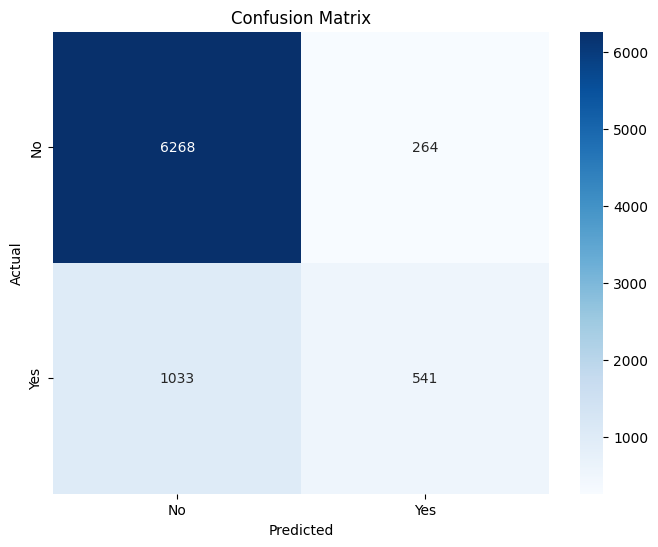

In [ ]:
# Generate confusion matrix
cm = metrics.confusion_matrix(y_val_encoded, y_pred)

# # Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# compute scores for the 5 folds...
# remember, this makes 5 seperate models, and tests them each on a different 0.2 of the data set.
# the scores for these tests are returned in a list.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mlp_model, X_train_encoded, y_train_encoded, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(scores.mean())

[-0.16468774 -0.16422513 -0.15975328 -0.15916101 -0.16949414]
-0.16346426076025108


In [ ]:
#implement logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', penalty='l1')
# print(y_train_encoded)
# y_train_enc = decode_multi_class(y_train_encoded)
# y_val_decoded_lr = decode_multi_class(y_val_encoded)

lr_model.fit(X_train_encoded, y_train_encoded)
y_pred_lr = lr_model.predict(X_val_encoded)

print(metrics.mean_squared_error(y_val_encoded, y_pred_lr))
print(metrics.accuracy_score(y_val_encoded, y_pred_lr))


0.16382926227485814
0.8361707377251418


In [ ]:
scores = cross_val_score(lr_model, X_train_encoded, y_train_encoded, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(scores.mean())

[-0.30406832 -0.30128574 -0.29428133 -0.28449434 -0.29063519]
-0.2949529840721551


In [ ]:
#implement decision tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_encoded, y_train_encoded)
y_pred_dt = dt_model.predict(X_val_encoded)

print(metrics.mean_squared_error(y_val_encoded, y_pred_dt))
print(metrics.accuracy_score(y_val_encoded, y_pred_dt))

0.18739205526770294
0.812607944732297


In [ ]:
scores = cross_val_score(dt_model, X_train_encoded, y_train_encoded, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(scores.mean())

[-0.33947419 -0.1480522  -0.10420265 -0.10372289 -0.11235847]
-0.16156208021492996


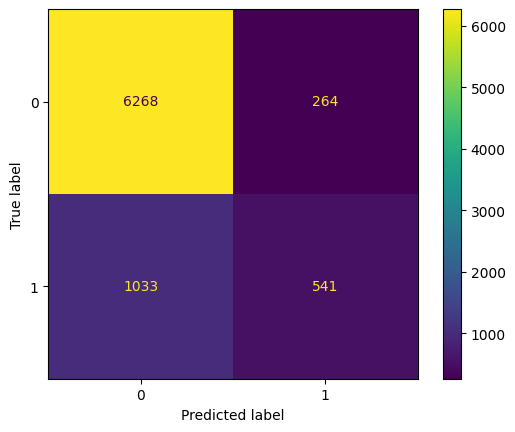

In [ ]:
cm = confusion_matrix(y_val_encoded, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<Axes: xlabel='country', ylabel='Count'>

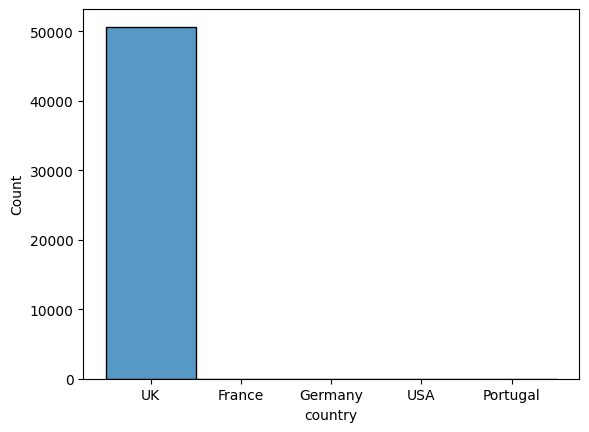

In [ ]:
#plot histogram of country
sns.histplot(wallace_df['country'])

In [ ]:
#Job Column
def get_percentage(df: np.array, column: str, value) -> None:
  unknown_total = wallace_df[column].value_counts().loc[value]
  total = wallace_df[column].value_counts().sum()
  print(f"percentage of unknown values: {(unknown_total / total * 100):.2f}%")

get_percentage(wallace_df, 'job', 'unknown')

percentage of unknown values: 0.65%


Job field options

    1. Drop the rows were job column value is ‘unknown’ since the number of rows is less that 5%

    2. Assume it to be another category

    3. Replace unknown value with the most occurring category

    4. Fix the data


In [ ]:
countries = wallace_df['country'].unique()
countries = countries[countries != 'UK']
filter = wallace_df['country'].isin(countries)
wallace_df[filter]

ID        town   country  age         job   married  education  \
632   79806939    Basildon    France   39  management   married   tertiary   
658   20895885    Aberdeen    France   49  technician  divorced  secondary   
747   14855363     Norwich   Germany   37  management   married   tertiary   
1338  74486719        Sale       USA   26  technician    single  secondary   
6746  54594566  Birmingham  Portugal   50   housemaid   married   tertiary   

     arrears  current_balance housing has_tv_package last_contact  conn_tr  \
632       no             5.62      no             no     cellular        3   
658       no            -2.36     yes             no      unknown        1   
747       no             6.30      no             no     cellular        2   
1338      no            12.31     yes             no     cellular        2   
6746      no            52.60     yes             no     cellular        1   

      last_contact_this_campaign_day last_contact_this_campaign_month  \
632                               13                              sep   
658                               26                              may   
747                               30                              apr   
1338                               3                              jun   
6746                              24                              jul   

      this_campaign  days_since_last_contact_previous_campaign  \
632               2                                         -1   
658               2                                         -1   
747               1                                         87   
1338              2                                         96   
6746              2                                         -1   

      contacted_during_previous_campaign outcome_previous_campaign  \
632                                    0                   unknown   
658                                    0                   unknown   
747                                    1                   success   
1338                                   5                   success   
6746                                   0                   unknown   

     new_contract_this_campaign  
632                          no  
658                          no  
747                         yes  
1338                        yes  
6746                         no

Firstly France, Germany, USA and portugal seem to be outliers.

Careful analysis of the result above shows that the towns are located in UK and not in the countries that were inputted e.g Aberdeen is in UK not France.

We need to replace, the France, Germany, USA and portugal with UK. So UK is now the only value for the country column. Since this column has zero variance, it contributes nothing to the model. So we remove the country column from the features.

<Axes: xlabel='country', ylabel='Count'>

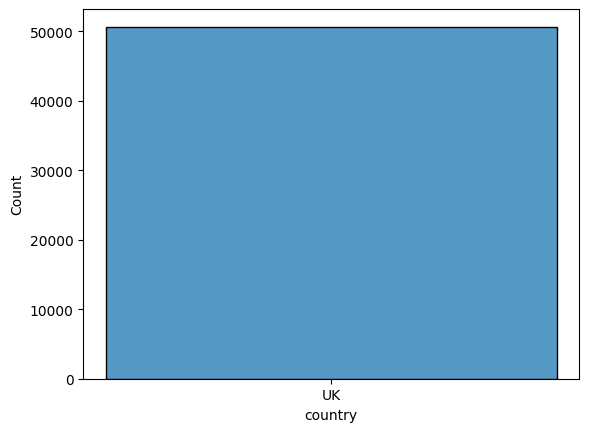

In [ ]:
sns.histplot(wallace_df['country'])

In [ ]:
wallace_df['education'].value_counts()
get_percentage(wallace_df, 'education', 'unknown')

percentage of unknown values: 4.14%


Education field options

    1. Drop the rows were column value is ‘unknown’ since the number of rows is less that 5%

    2. Assume it to be another category

    3. Replace unknown value with the most occurring category

    4. Fix the data

Since the age distribution is significantly skewed, we consider transformations (e.g., log, square root) or non-parametric statistical methods for analysis.

arrears
no     49794
yes      868
Name: count, dtype: int64

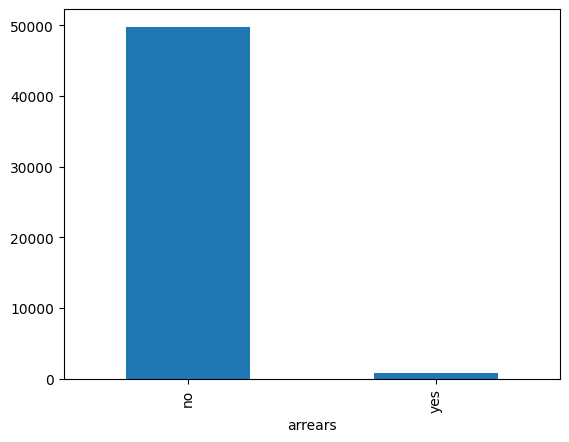

In [ ]:
wallace_df['arrears'].value_counts().plot(kind='bar')
wallace_df['arrears'].value_counts()

1. We likely have to apply under or over sampling to the arrears field.

2. We can drop the column

In [ ]:
#has_tv_package
wallace_df['has_tv_package'].value_counts()

has_tv_package
no     42886
yes     7771
n          5
Name: count, dtype: int64

Options:

1. We have to replace values 'n' with 'no'

2. Drop rows

In [ ]:
wallace_df['last_contact'].value_counts()

last_contact
cellular     33595
unknown      13753
telephone     3312
cell             2
Name: count, dtype: int64

last contact field options

    1. Drop the rows were column value is ‘unknown’ since the number of rows is less that 5%

    2. Assume it to be another category

    3. Replace unknown value with the most occurring category

    4. Fix the data

In [ ]:
wallace_df['outcome_previous_campaign'].value_counts()

outcome_previous_campaign
unknown    40614
failure     5498
success     2406
other       2144
Name: count, dtype: int64

**outcome_previous_campaign Options**

1. Drop column

2. Under or Over sampling

In [ ]:
wallace_df['new_contract_this_campaign'].value_counts()

new_contract_this_campaign
no     40763
yes     9899
Name: count, dtype: int64

1. Under or Over sampling

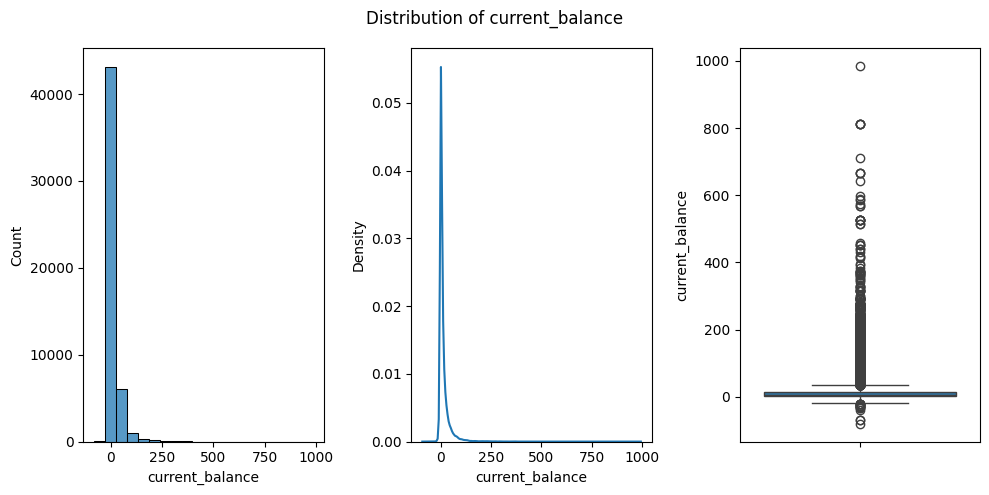

Skewness: 8.139517560476294
Skewness Test Statistic: 0.4587272553349323
P-value: 1.315427163145332e-144
The distribution is not normal (reject the null hypothesis).


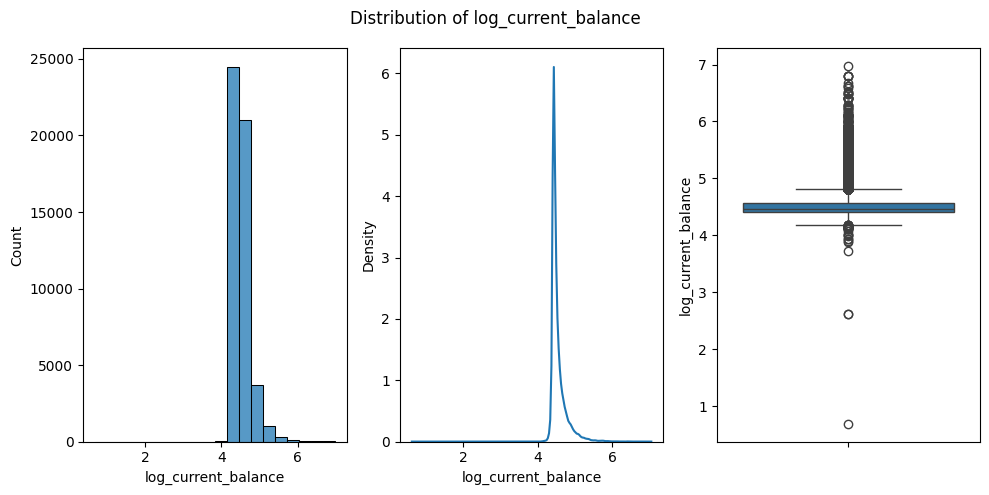

Skewness: 2.842347744068509
Skewness Test Statistic: 0.6926909410276022
P-value: 1.135836969710173e-127
The distribution is not normal (reject the null hypothesis).


In [ ]:
# wallace_df['current_balance'].hist(bins=10)
plot_hist_kde(wallace_df, 'current_balance')
check_normal_distribution(wallace_df, 'current_balance')
log_transformation(wallace_df, 'current_balance', np.log, abs(wallace_df['current_balance'].min()) + 2)
plot_hist_kde(wallace_df, 'log_current_balance')
check_normal_distribution(wallace_df, 'log_current_balance')

In [ ]:
wallace_df['conn_tr'].value_counts()


conn_tr
2    10234
4    10216
3    10180
5    10085
1     9947
Name: count, dtype: int64

In [ ]:
#sort by current_balance
# wallace_df.sort_values(by='current_balance', ascending=True)
# # wallace_df[filter]
# # wallace_df[filter]['current_balance'].min()
# #get minimum value from a column
# abs(wallace_df['current_balance'].min())
# wallace_df

In [ ]:
wallace_df['last_contact_this_campaign_month'].value_counts()

last_contact_this_campaign_month
may    14869
jul     7540
aug     6934
jun     5912
nov     4416
apr     3471
feb     3072
jan     1570
oct     1034
sep      839
mar      701
dec      303
j          1
Name: count, dtype: int64

In [ ]:
#plot histogram
def plot_hist(column: str):
  sns.histplot(wallace_df[column])

# plot_hist('contacted_during_previous_campaign')

In [ ]:
g_arrears = wallace_df.groupby('arrears')
g_arrears.size()

arrears
no     49794
yes      868
dtype: int64

<Axes: xlabel='arrears'>

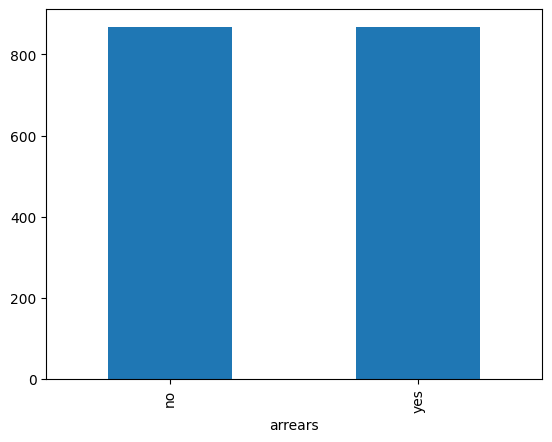

In [ ]:
df = undersample_column(wallace_df, 'arrears')

# df = oversample_colummn(wallace_df, 'arrears')
df['arrears'].value_counts().plot(kind='bar')

arrears column is unbalanced, so we need to balance the column. Then convert to binary(0 & 1)

In [ ]:
def check_column(column: str, df: np.array) -> Tuple[int, int]:
  return df[column].isnull().sum(), df[column].isna().sum()

check_column('arrears', wallace_df)

(0, 0)

In [ ]:
#check if column has duplicates
def check_duplicates(column: str, df: np.array) -> int:
  return df.duplicated().sum()

check_duplicates('arrears', wallace_df)

0

In [ ]:
#convert arreasrs to binary
def get_binary(column: str, df: np.array):
  return pd.get_dummies(df[column], prefix_sep='_', drop_first=True)

In [ ]:
# wallace_df['contacted_during_previous_campaign'].unique()

In [ ]:
# wallace_df = balance_data('contacted_during_previous_campaign')
# plot_hist('contacted_during_previous_campaign')